# Applied Statistics and Inference Assignment (DA-AG-006)

## Question 1: What are Type I and Type II errors in hypothesis testing, and how do they impact decision-making?

**Answer:**  
- **Type I Error (False Positive):** Rejecting the null hypothesis (H0) when it is actually true.  
  - Example: Concluding a drug works when it does not.  
  - Impact: Leads to **incorrect acceptance of an effect**, unnecessary actions.  
- **Type II Error (False Negative):** Failing to reject H0 when it is false.  
  - Example: Concluding a drug does not work when it actually does.  
  - Impact: Missed opportunities, ineffective decisions.

---

## Question 2: What is the P-value in hypothesis testing, and how should it be interpreted in the context of the null hypothesis?

**Answer:**  
- **P-value:** The probability of obtaining a test statistic at least as extreme as the observed one, assuming H0 is true.  
- **Interpretation:**  
  - Low P-value (≤ α) → reject H0 (evidence against null).  
  - High P-value (> α) → fail to reject H0 (not enough evidence).

---

## Question 3: Explain the difference between a Z-test and a T-test, including when to use each.

**Answer:**  
| Feature | Z-test | T-test |
|---------|--------|--------|
| Used when | Population std known or large sample (n>30) | Population std unknown, small sample (n≤30) |
| Distribution | Standard normal | Student's t |
| Purpose | Test population mean | Test sample mean vs population mean |
| Example | Testing average height of adults (n=1000, σ known) | Testing average test score of class (n=25, σ unknown) |


## Question 4: What is a confidence interval, and how does the margin of error influence its width and interpretation?

**Answer:**  
- **Confidence Interval (CI):** Range of values likely to contain the population parameter.  
- **Margin of Error (ME):** Determines width of CI: CI = estimate ± ME  
  - Larger ME → wider CI → less precision  
  - Smaller ME → narrower CI → more precision  
- Interpretation: 95% CI means we are 95% confident the true value lies within the interval.

---

## Question 5: Describe the purpose and assumptions of an ANOVA test. How does it extend hypothesis testing to more than two groups?

**Answer:**  
- **Purpose:** Compare means of **three or more groups** to determine if at least one group differs significantly.  
- **Assumptions:**  
  1. Independent observations  
  2. Normally distributed populations  
  3. Homogeneity of variances  
- **Extension:** While t-tests compare two groups, ANOVA allows **simultaneous comparison of multiple groups** without increasing Type I error.


In [5]:
# Question 6: One-sample Z-test
import numpy as np
from statsmodels.stats.weightstats import ztest

# Sample data
data = np.array([102, 100, 98, 105, 99, 101, 97, 103])
pop_mean = 100

# Perform one-sample Z-test
z_stat, p_value = ztest(data, value=pop_mean)

# Round results for clarity
z_stat = round(z_stat, 3)
p_value = round(p_value, 3)

# Display results
print("Z-statistic:", z_stat)
print("P-value:", p_value)

# Significance level
alpha = 0.05

# Decision and interpretation
if p_value < alpha:
    print("Decision: Reject null hypothesis")
    print("Interpretation: Sample mean is significantly different from population mean")
else:
    print("Decision: Fail to reject null hypothesis")
    print("Interpretation: Sample mean is NOT significantly different from population mean")


Z-statistic: 0.662
P-value: 0.508
Decision: Fail to reject null hypothesis
Interpretation: Sample mean is NOT significantly different from population mean


Sample mean: 5.021
Sample standard deviation: 1.625


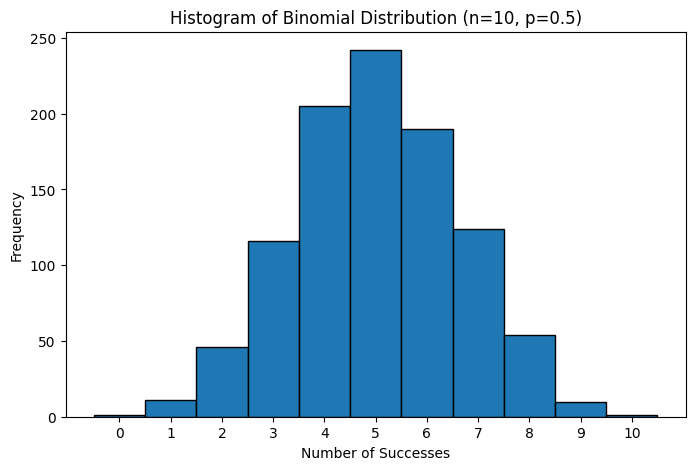

In [6]:
# Question 7: Binomial distribution simulation
import numpy as np
import matplotlib.pyplot as plt

# Parameters
n = 10     # number of trials
p = 0.5    # probability of success
size = 1000  # number of samples

# Simulate binomial data
binom_data = np.random.binomial(n, p, size)

# Calculate mean and std
sample_mean = round(np.mean(binom_data), 3)
sample_std = round(np.std(binom_data), 3)

# Display results
print("Sample mean:", sample_mean)
print("Sample standard deviation:", sample_std)

# Plot histogram
plt.figure(figsize=(8,5))
plt.hist(binom_data, bins=range(0, n+2), edgecolor='black', align='left')
plt.title("Histogram of Binomial Distribution (n=10, p=0.5)")
plt.xlabel("Number of Successes")
plt.ylabel("Frequency")
plt.xticks(range(0, n+1))
plt.show()


Mean of sample means: 1.98
Std deviation of sample means: 0.286


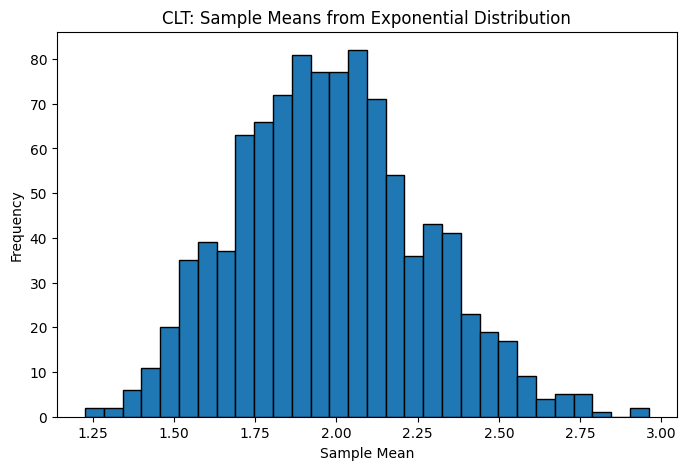

In [7]:
# Question 8: Central Limit Theorem demonstration
import numpy as np
import matplotlib.pyplot as plt

# Population: non-normal distribution (exponential)
population = np.random.exponential(scale=2, size=10000)

# Parameters
sample_size = 50
num_samples = 1000

# Generate sample means
sample_means = [np.mean(np.random.choice(population, sample_size, replace=False)) for _ in range(num_samples)]

# Mean and std of sample means
mean_of_means = round(np.mean(sample_means), 3)
std_of_means = round(np.std(sample_means), 3)

print("Mean of sample means:", mean_of_means)
print("Std deviation of sample means:", std_of_means)

# Plot histogram
plt.figure(figsize=(8,5))
plt.hist(sample_means, bins=30, edgecolor='black')
plt.title("CLT: Sample Means from Exponential Distribution")
plt.xlabel("Sample Mean")
plt.ylabel("Frequency")
plt.show()


Sample mean: 14.5
95% Confidence Interval: (np.float64(13.389), np.float64(15.611))


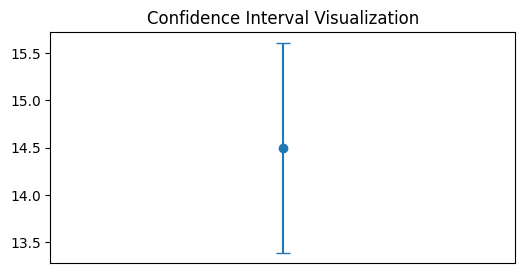

In [8]:
# Question 9: Confidence Interval for sample mean
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

# Function to calculate confidence interval
def confidence_interval(data, confidence=0.95):
    n = len(data)
    mean_val = np.mean(data)
    std_val = np.std(data, ddof=1)
    z_score = norm.ppf(1 - (1 - confidence)/2)
    margin_error = z_score * (std_val / np.sqrt(n))
    ci_lower = mean_val - margin_error
    ci_upper = mean_val + margin_error
    return mean_val, ci_lower, ci_upper

# Sample data
data = [12, 15, 14, 16, 13, 15, 14, 17]

mean_val, ci_lower, ci_upper = confidence_interval(data)
mean_val = round(mean_val, 3)
ci_lower = round(ci_lower, 3)
ci_upper = round(ci_upper, 3)

print("Sample mean:", mean_val)
print("95% Confidence Interval:", (ci_lower, ci_upper))

# Plot visualization
plt.figure(figsize=(6,3))
plt.errorbar(x=1, y=mean_val, yerr=[[mean_val - ci_lower], [ci_upper - mean_val]], fmt='o', capsize=5)
plt.xlim(0,2)
plt.title("Confidence Interval Visualization")
plt.xticks([])
plt.show()


In [9]:
# Question 10: Chi-square goodness-of-fit test
import numpy as np
from scipy.stats import chisquare

# Observed and expected frequencies
observed = np.array([50, 30, 20])
expected = np.array([40, 40, 20])

# Chi-square test
chi2_stat, p_value = chisquare(f_obs=observed, f_exp=expected)

chi2_stat = round(chi2_stat, 3)
p_value = round(p_value, 3)

print("Chi-square statistic:", chi2_stat)
print("P-value:", p_value)

# Significance level
alpha = 0.05

if p_value < alpha:
    print("Decision: Reject null hypothesis")
    print("Interpretation: Observed distribution differs significantly from expected")
else:
    print("Decision: Fail to reject null hypothesis")
    print("Interpretation: Observed distribution does NOT differ significantly from expected")


Chi-square statistic: 5.0
P-value: 0.082
Decision: Fail to reject null hypothesis
Interpretation: Observed distribution does NOT differ significantly from expected
